# SET Operations

### Import "standard" libraries

In [1]:
# Import libraries first
%matplotlib inline
import numpy as np
import scipy.interpolate as interpol
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import sys, logging, os, re
import time

import seaborn as sns
import scipy
import scipy.io as sio

### Import specific libraries/functions to use for Sets:
 * [SymPy](http://www.sympy.org/en/index.html): is a Python library for symbolic mathematics. 
 * [matplotlib_venn](https://pypi.python.org/pypi/matplotlib-venn): Functions for plotting area-proportional two- and three-way Venn diagrams in matplotlib.

In [16]:
import sympy as sym
from matplotlib_venn import venn3, venn3_circles, venn2, venn2_circles

***
## Todays' Summary
* Definitions
* Notation
* Venn Diagrams
* Set operations

Follow these links:
- [Introduction](#Introduction)
- [Definitions](#Definitions)
- [Subsets](#Subsets)
    - [Subsets Facts](#Subsets-Facts)
- [Set equality](#Set-equality)
- [Set operations](#Set-operations)
    - [Union](#Union)
    - [Intersection](#Intersection)
    - [Disjoint](#Disjoint)
    - [Complement](#Complement)
    - [Difference](#Difference)
    

***
## Introduction
* Sets are one of the basic building blocks for the types of objects considered in discrete mathematics.
    * Important for counting. 
    * Programming languages have set operations.
* Set theory is an important branch of mathematics.
    * Many different systems of axioms have been used to develop set theory.
    * Here we are not concerned with a formal set of axioms for set theory. Instead, we will use what is called naïve set theory.

***
## Definitions

A <font color='red'> **set** $A$</font> is a collection of objects, called *members* or *elements* and we express this as $A=\{a_1, a_2, ..., a_n\}$.
   * If an element *a belongs* to the set A we write $a \in A$.
   * If an element $a$ does *NOT* belong to the set A we write $a \notin A$.
   * A set that contains NO elements is called an *empty set*, and it is denoted by $\{ \}$ or $\emptyset$.
   * Order of elements does not matter.
   * Listing the elements more than once does NOT change the set, i.e. repeated elements do not count.
   
>### Examples
> 1. Set of all vowels in the English aplhabet: $V=\{a, e, i ,o, u\}$.
> 2. Set of all positive ODD integers less than 10: $P=\{1,3,5,7,9\}$ or $\{ x \in \mathbb Z \ x \ odd,\ 0<x<10 \}$.
> 3. Set of all integers less than 0: $N=\{...,-3, -2, -1 \}$ or $\{ x \in \mathbb Z \ ,\ ?????? \}$. 

>> #### Comments
>> 1. The expression we see on the right hand-side of examples 2 and 3, is called *set builder notation*, meaning that we have a shared property between the elements of the set.
>> 2. Sets like V and P are called *finite* sets as we can count the number of elements in these sets. Otherwise, sets like N are called *infinite*. Finite sets are said to have *cardinality* $n$. The $n$ is the number of distinct elements of the finite set. 

Below you can see some simple examples on sets.

In [17]:
# Creating symbols (mathematical constants that act as elements)
a, b, c, d, e, i, o, u = sym.symbols("a, b, c, d, e, i, o, u")

In [18]:
# The sets V, P, and N are the sets defined in the above examples. Here, we define them in the Python enviroment.
V=set([a,e,i,o,u])
P=set([1,3,15,7,9])
N=set([-5,-4,-3,-2,-1])
# Printing the set to the screen
print('1. V=',V)
print('2. P=',P)
print('3. N=',N)

1. V= {u, o, i, a, e}
2. P= {1, 3, 7, 9, 15}
3. N= {-1, -5, -4, -3, -2}


In [19]:
# or we can print them on the screen all together or one at a time
V, P, N

({u, o, i, a, e}, {1, 3, 7, 9, 15}, {-5, -4, -3, -2, -1})

In [20]:
P

{1, 3, 7, 9, 15}

**Note that the repeated elements do not count.** 

In [21]:
# Create a finite set with repeated elements
A = sym.FiniteSet(a, a, a, b, b, c, e, e, e)

# Print it to the screen
A 
# Observe that repeated elemenst will be omitted

{a, b, c, e}

In [22]:
# Defining the three finite sets (again) using sympy this time! This is just a different way of expressing the same thing.
V=sym.FiniteSet(a, e, i, o, u)
P=sym.FiniteSet(1,3,5,7,9)
N=sym.FiniteSet(-5,-4,-3,-2,-1)

In [23]:
# Checking if V set is finite
V.is_FiniteSet

True

In [24]:
# Is 1 in the set P?
2 in P

False

In [25]:
# Is -6 in the set N?
-6 in N

False

It is worth mentioning here that *Sympy* contains the singleton called ```S```.  
The singleton is a set with only one element.

In [26]:
type(sym.S)

sympy.core.singleton.SingletonRegistry

Here are some common sets we will be using:
* $\mathbb N$ is the set of natural numbers, i.e. $\mathbb N=\{1, 2, 3, ...\}$.
* $\mathbb Z$ is the set of integers, i.e. $\mathbb Z=\{...,-3, -2, -1, 0, 1, 2, 3, ...\}$.
* $\mathbb R$ is the set of real numbers
* $\mathbb Q$ is the set of rational numbers, i.e. fractions.

These sets are mainly going to be used as our domain---the **universal** set $U$.

Note that we ALSO have the counting numbers, $ \left\{ 0, 1, 2, 3, 4, 5, \dots \right\} $.  The counting numbers are represented in *sympy* as ```sympy.S.Naturals0```.

The integers, $ \mathbb{Z} $, are represented by ```sympy.S.Integers```.

In [27]:
# Is one-half an integer?
1 / 2 in sym.S.Integers

False

And of course, We have the real numbers, $ \mathbb{R} $. The corresponding set is called sym.S.Reals.

[Back to the top](#Todays'-Summary)

***
## Subsets
$A \subseteq B$ :  "$A$ is a subset of $B$" or "$A$ is contained in $B$"


* $A$ is a subset of $B$ if and only if **every** element of A is also an element of B.
* We can completely formalize this:  $A \subseteq B \iff \forall x \ (x\in A \to x\in B)$ 

>### Examples
> 1. A = {3, 9},       B = {5, 9, 1, 3},       $A \subseteq B$ ?
> 2. C = {3, 3, 3, 9}, D = {5, 9, 1, 3},       $C \subseteq D$ ?
> 3. E = {1, 2, 3},    F = {2, 3, 4},          $E \subseteq F$ ? 

For answering these, let's use sympy....


In [28]:
# example #1
A=sym.FiniteSet(3,9,8)
B=sym.FiniteSet(5,9)
# check for subset:
B.is_subset(A)

False

In [29]:
# example #2
C=sym.FiniteSet(3,9)
D=sym.FiniteSet(5,9,1,3)
# check for subset:
C.is_subset(D)

True

In [30]:
# example #3
E=sym.FiniteSet(1,2,3)
F=sym.FiniteSet(2,3,4)
# check for subset:
E.is_subset(F)

False

>### Subsets Facts
> #### Useful rules:
> 1. $\varnothing \subseteq A$ for any set $A$ 
> 2. $A \subseteq A$ for any set $A$
>
> #### Proper subset:
There is also a proper subset, $A \subset B$, which is defined if there are elements in $B$ that are not in $A$. 
> 1. $A \subset B$:     “$A$ is a proper subset of $B$” 
> 2. $A \subset B \iff \forall x \ (x \in A \to x \in B) \land \exists x \ (x \in B \land x \notin A)$
>
> **Note:** *A is never a proper subset of itself*


In [31]:
# Are the integers a proper subset of the real numbers
sym.S.Integers.is_proper_subset(sym.S.Reals)

True

[Back to the top](#Todays'-Summary)

Now, this discussion easily leads to the equality of sets. If we have two sets, $A$ and $B$ taken from a universal set $U$, when are they equal?

***
## Set equality

Two sets $A$ and $B$ are equal if they have exactly the same elements. In that case we write $A=B$.


Mathematically speaking, two sets $A$ and $B$ are equal if and only if $A \subseteq B$ and $B \subseteq A$.

Otherwise $A\neq B$.

> ### Examples
> 1. A = {9, 2, 7, -3},     B = {7, 9, -3, 2},              $A=B$?
> 2. C = {dog, cat, horse}, D = {cat, horse, squirrel, dog},$C=D$?
> 3. E = {1, 3, 2},         F = {1, 2, 1, 3},               $E=F$?  

In [32]:
# example #1
A=sym.FiniteSet(9,2,7,-3)
B=sym.FiniteSet(7,9,-3,2)
# check for set equality
A==B

True

In [33]:
# example #2
C=sym.FiniteSet('dog','cat','horse')
D=sym.FiniteSet('cat','horse','squireel','dog')
# check for set equality
C==D

False

In [34]:
# example #3
E=sym.FiniteSet(1,3,2)
F=sym.FiniteSet(1,2,1,3)
# check for set equality
E==F

True

[Back to the top](#Todays'-Summary)

***
## Set operations

### Union 

$A \cup B = \{ x \ | \ x \in A  \lor x \in B\}$

Contains elements in either $A$ <font color='red'> **or** </font> $B$ <font color='red'> **or both** </font>.

(You can think of union as combining the elements of the sets)

>### Example: 
Change the sets to see what happens

In [35]:
A = sym.FiniteSet(a, b)
B = sym.FiniteSet(b, c, d, a,i)

In [36]:
# sympy calculates the union
sym.Union(A, B)

{a, b, c, d, i}

In [37]:
# or we can also use the following command as an alternative
A.union(B)

{a, b, c, d, i}

In [38]:
# Prints the number of the elements in the union of A and B, i.e. the number of elements in the intersection 
# len() stands for the length of a list 
len(set(A)|set(B)) 
# | is the symbol for the OR operator

5

***
### Intersection

$A \cap B = \{x \ | \ x \in A \land x \in B \}$

Contains elements in both $A$ <font color='red'> **and**</font> $B$.

(You can think of intersection as looking for elements that appear in both sets)

>### Example:

In [39]:
# Creating symbols (mathematical constants that act as elements)
a, b, c, d, e, f, g, h = sym.symbols("a, b, c, d, e, f, g, h")

In [40]:
A = set([a, b])
B = set([b, c, d])
W=sym.FiniteSet(1, 2, 3, 4, 5)
V=sym.FiniteSet(1, 3, 5, 7, 9)

In [41]:
G=sym.FiniteSet(a,b)
F=sym.FiniteSet(a,b,c,d,e)
sym.Intersection(F,G)

{a, b}

In [42]:
sym.Union(F,G)

{a, b, c, d, e}

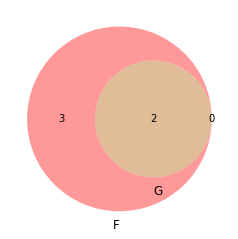

In [43]:
v = venn2([F,G], ('F', 'G'))


Note that above figure is called a **Venn Diagram** and it can be use for any number of sets.

Note also that Venn diagram can be use to represent union and intersection (and complement) of sets.

BUT be careful, the numbers writen within the specific areas represent the number of elements they include!!!

In [44]:
sym.Intersection(W, V)

{1, 3, 5}

In [45]:
W.intersection(V)

{1, 3, 5}

In [46]:
sym.Union(W, V)

{1, 2, 3, 4, 5, 7, 9}

In [47]:
W.is_subset(V)

False

In [48]:
# Prints the number of common elements of set A and B, i.e. the number of elements in the intersection 
# len() stands for the length of a list
len(set(A)&set(B)) 
# & is the symbol for AND operator

1

In [49]:
A.intersection(B)

{b}

***
### Disjoint
$A \cap B = \emptyset$

Two sets are called disjoint if their intersection is **empty**, that is, they have no elements in common.



>### Example:

Using the singleton we can define the empty set within *Sympy*.

In [50]:
sym.S.EmptySet

EmptySet()

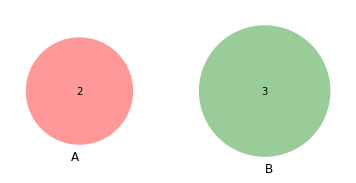

In [51]:
fig = plt.figure()
A = set([a, b])
B = set([c, d, e])

v = venn2([A,B], ('A', 'B'))

# A.intersection(B)

In [52]:
fig = plt.figure()
W=sym.FiniteSet(1, 2, 3, 4, 5)
V=sym.FiniteSet(1, 3, 5, 7, 9)

# v = venn2([W,V], ('W', 'V'))
# W.intersection(V)
# len(set(W)&set(V)) 
4 in sym.Intersection(W, V)

False

***
### Complement
$\overline{A} = U - A$ and it is the set $$ \overline{A} = \left\{ x \quad | \quad x \in U, \quad x \notin A \right\} $$

The complement of a set $A$ contains exactly those elements in the universal set that are <font color='red'> **not**</font> in $A$. 

It is also written as $ A' $ or $A^c$.

>>Note that:
 1. $x \in \overline{A}  \iff x \notin A$
 2. $\overline{A} \cup A = U$
 3. $\overline{A} \cap A = \emptyset$
 4. $\overline{\overline{A}}=A$


>### Example:

In [53]:
# Creating two  sets
U = sym.FiniteSet(1, 2, 3, 4, 5, 6, 7, 8, 9)
A = sym.FiniteSet(3, 5, 7)

# Printing both to the screen
U, A

({1, 2, 3, 4, 5, 6, 7, 8, 9}, {3, 5, 7})

In [54]:
# Setting U as a universal set
U.is_UniversalSet

In [55]:
# Calculating the complement of A (with respect to U)
A.complement(U)

{1, 2, 4, 6, 8, 9}

In [56]:
# Creating two  sets
U = sym.S.Naturals
A = sym.FiniteSet(3, 5, 7)

# Printing both to the screen
U, A

(S.Naturals, {3, 5, 7})

In [57]:
A.complement(U)

S.Naturals \ {3, 5, 7}

***
### Difference

$A - B= \left\{ x \in U \ \ | \quad x \in \ A \ \wedge \ x \notin B \right\} $

The **difference** between sets $A$ and $B$ contains exactly those elements of $A$ that are not in $B$.

Note that we actually *subtract* the elements of the second set from those in the first.

>### Example:

In [58]:
A = set([a, b])
B = set([b, c, d, ])

A, B

({a, b}, {d, b, c})

In [59]:
A-B

{a}

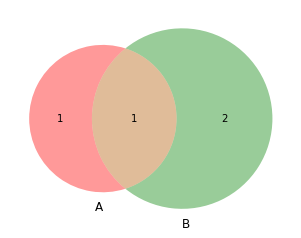

In [60]:
v = venn2([A,B], ('A', 'B'))

[Back to the top](#Todays'-Summary)